In [1]:
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import Embedding
from keras.layers import LSTM
from keras.layers import Conv1D, MaxPooling1D
from keras.datasets import imdb

Using TensorFlow backend.


In [2]:
import numpy
import tensorflow as tf
import matplotlib.pyplot as plt

In [3]:
# seed 값 설정
seed = 0
numpy.random.seed(seed)
tf.random.set_seed(3)

In [4]:
# 학습셋과 테스트셋 지정하기
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=5000)

17465344/17464789 [==============================] - 13s 1us/step


C:\Users\chang\anaconda3\envs\changho\lib\site-packages\keras\datasets\imdb.py:101: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
C:\Users\chang\anaconda3\envs\changho\lib\site-packages\keras\datasets\imdb.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [5]:
# 데이터 전처리
x_train = sequence.pad_sequences(x_train, maxlen=100)
x_test = sequence.pad_sequences(x_test, maxlen=100)

In [8]:
# 모델의 설정
model = Sequential()
model.add(Embedding(5000,100))
model.add(Dropout(0.5))
model.add(Conv1D(64, 5, padding='valid', activation='relu', strides=1))
model.add(MaxPooling1D(pool_size=4))
model.add(LSTM(55))
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 100)         500000    
_________________________________________________________________
dropout_3 (Dropout)          (None, None, 100)         0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, None, 64)          32064     
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, None, 64)          0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 55)                26400     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 56        
_________________________________________________________________
activation_2 (Activation)    (None, 1)                

In [9]:
# 모델의 컴파일
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [10]:
# 모델의 실행
history = model.fit(x_train, y_train, batch_size=100, epochs=5, validation_data=(x_test, y_test))

C:\Users\chang\anaconda3\envs\changho\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 25000 samples, validate on 25000 samples
Epoch 1/5
25000/25000 [==============================] - 14s 542us/step - loss: 0.4686 - accuracy: 0.7604 - val_loss: 0.3350 - val_accuracy: 0.8534
Epoch 2/5
25000/25000 [==============================] - 13s 535us/step - loss: 0.2942 - accuracy: 0.8759 - val_loss: 0.3350 - val_accuracy: 0.8504
Epoch 3/5
25000/25000 [==============================] - 13s 535us/step - loss: 0.2460 - accuracy: 0.9016 - val_loss: 0.3280 - val_accuracy: 0.8564
Epoch 4/5
25000/25000 [==============================] - 13s 533us/step - loss: 0.2089 - accuracy: 0.9196 - val_loss: 0.3559 - val_accuracy: 0.8533
Epoch 5/5
25000/25000 [==============================] - 13s 535us/step - loss: 0.1751 - accuracy: 0.9342 - val_loss: 0.3627 - val_accuracy: 0.8538


In [11]:
# 테스트의 정확도 출력
print("\n Test Accuracy: %.4f" % (model.evaluate(x_test, y_test)[1]))

25000/25000 [==============================] - 3s 127us/step

 Test Accuracy: 0.8538


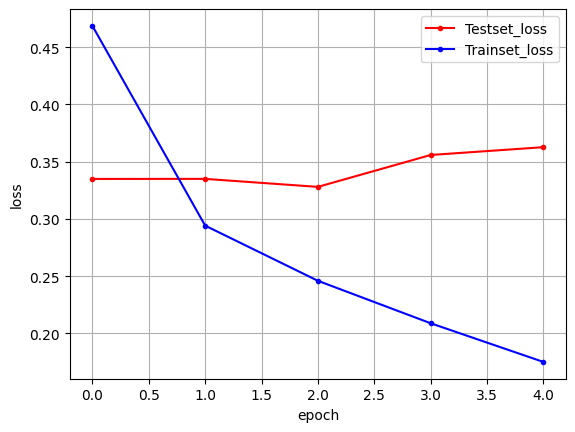

In [13]:
# 테스트셋의 오차
y_vloss = history.history['val_loss']

# 학습셋의 오차
y_loss = history.history['loss']

# 그래프로 표현
x_len = numpy.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()